In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

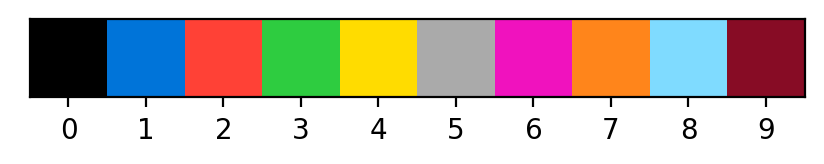

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

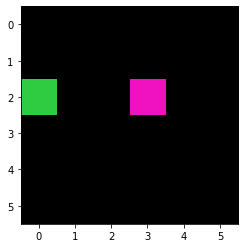

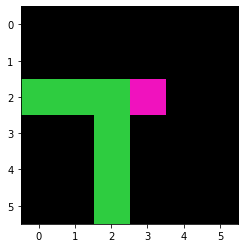

In [9]:
a=Evals[348]["train"][0]["input"]
b=Evals[348]["train"][0]["output"]
plot_picture(a)
plot_picture(b)

In [10]:
a1=np.bincount(np.array(a).flatten(),minlength=10)
b1=np.bincount(np.array(b).flatten(),minlength=10)

In [11]:
b1

array([29,  0,  0,  6,  0,  0,  1,  0,  0,  0], dtype=int64)

In [12]:
def increase_color(a,b):
    list1=[]
    a1=np.bincount(np.array(a).flatten(),minlength=10)
    b1=np.bincount(np.array(b).flatten(),minlength=10)
    for i in range(10):
        if b1[i]>a1[i] and a1[i]!=0:
            list1.append(i)
    return list1

In [13]:
increase_color(a,b)

[3]

In [14]:
def rotate_basic_task_by_init(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    newinput=[Input[0]]
    newoutput=[Output[0]]
    list0=[]
    total_color_list=[]
    for x, y in zip(Input,Output):
        color_list=increase_color(x,y)
        for c in color_list:
            if c not in total_color_list:
                total_color_list.append(c)
    if total_color_list==[]:
        return -1,-1
    for A in [Input[0]]:
        A_array=np.array(A)
       
        A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
        m,n=A_pad.shape
        dict1={}
        A1=A_pad.copy()
        A2=A_pad.copy()
        for i in range(m):
            for j in range(n):
                #if A1[i,j]!=-1 and A1[i,j]!=0:
                if A1[i,j] in total_color_list:
                    part1=A1[i-1,j]
                    part2=A1[i,j-1]
                    part3=A1[i,j]
                    part4=A1[i,j+1]
                    part5=A1[i+1,j]
                    if (part1,part2,part3,part4,part5) not in list0:
                        list0.append((part1,part2,part3,part4,part5))
    

    for A,B in zip(Input[1:],Output[1:]):
        solved=True
        for roti in range(4):
        
            list1=[]
            A_array=np.array(A)
            

            A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
            m,n=A_pad.shape
            dict1={}
            A1=A_pad.copy()
            A2=A_pad.copy()
            for i in range(m):
                for j in range(n):
                    #if A1[i,j]!=-1 and A1[i,j]!=0:
                    if A1[i,j] in total_color_list:
                        part1=A1[i-1,j]
                        part2=A1[i,j-1]
                        part3=A1[i,j]
                        part4=A1[i,j+1]
                        part5=A1[i+1,j]
                        if (part1,part2,part3,part4,part5) not in list1:
                            list1.append((part1,part2,part3,part4,part5))
            
            if list1!=list0:
                
                solved=False
                A=np.rot90(np.array(A)).tolist()
                B=np.rot90(np.array(B)).tolist()
                
            else:
                
                newinput.append(A)
                #plot_picture(A)
                newoutput.append(B)
                solved=True
                break
            if solved==False and i==3:
                return -1,-1
    #Test_Case
    A=Test_Case
    solved=True
    for roti in range(4):

        list1=[]
        A_array=np.array(A)


        A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
        m,n=A_pad.shape
        dict1={}
        A1=A_pad.copy()
        A2=A_pad.copy()
        for i in range(m):
            for j in range(n):
                #if A1[i,j]!=-1 and A1[i,j]!=0:
                if A1[i,j] in total_color_list:
                    part1=A1[i-1,j]
                    part2=A1[i,j-1]
                    part3=A1[i,j]
                    part4=A1[i,j+1]
                    part5=A1[i+1,j]
                    if (part1,part2,part3,part4,part5) not in list1:
                        list1.append((part1,part2,part3,part4,part5))
        if list1!=list0:
            solved=False
            A=np.rot90(np.array(A)).tolist()
           
        else:
            newinput.append(A)
            solved=True
            break
    if solved==False:
        return -1,-1
    return newinput,newoutput
            
                        

In [15]:
def findmodemap_cross(A,B,color_list):
    A_array=np.array(A)
    B_pad=np.pad(B,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    m,n=A_pad.shape
    dict1={}
    A1=A_pad.copy()
    A2=A_pad.copy()
    count=0
    for k in range(150):
        
        for i in range(m):
            for j in range(n):
                #if A1[i,j]!=-1 and A1[i,j]!=0:
                if A1[i,j] in color_list:
                    part1=A1[i-1,j]
                    part2=A1[i,j-1]
                    part3=A1[i,j]
                    part4=A1[i,j+1]
                    part5=A1[i+1,j]
                    if (part1,part2,part3,part4,part5) not in dict1:

                        part_b1=B_pad[i-1,j]
                        part_b2=B_pad[i,j-1]
                        part_b3=B_pad[i,j]
                        part_b4=B_pad[i,j+1]
                        part_b5=B_pad[i+1,j]
                        dict1[(part1,part2,part3,part4,part5)]=[part_b1,part_b2,part_b3,part_b4,part_b5]
                        
        
        A1_copy=A1.copy()
        #plot_picture(A2.tolist())
        #A1_copy=A1
        for i in range(m):
            for j in range(n):
                #if A1_copy[i,j]!=-1 and A1_copy[i,j]!=0:
                if A1[i,j] in color_list:
                    part1=A1_copy[i-1,j]
                    part2=A1_copy[i,j-1]
                    part3=A1_copy[i,j]
                    part4=A1_copy[i,j+1]
                    part5=A1_copy[i+1,j]
                
                    if (part1,part2,part3,part4,part5) in dict1:

                        list_from_dict=dict1[(part1,part2,part3,part4,part5)]
                        A2[i-1,j]=list_from_dict[0]
                        A2[i,j-1]=list_from_dict[1]
                        A2[i,j]=list_from_dict[2]
                        A2[i,j+1]=list_from_dict[3]
                        A2[i+1,j]=list_from_dict[4]

        #plot_picture(A2.tolist())                
        if (A2==A1_copy).all():
            count+=1
            
        else:
            count=0
        if count>=3:
            break

        A1=A2
            
            
    return dict1

In [16]:
# findmodemap_cross(a,b)

In [17]:
# a0=Evals[348]["train"][0]["input"]
# b0=Evals[348]["train"][0]["output"]

# a1=Evals[348]["train"][1]["input"]
# b1=Evals[348]["train"][1]["output"]

# a2=Evals[348]["train"][2]["input"]
# b2=Evals[348]["train"][2]["output"]

# a3=Evals[348]["train"][3]["input"]
# b3=Evals[348]["train"][3]["output"]

# a4=Evals[348]["train"][4]["input"]
# b4=Evals[348]["train"][4]["output"]

# findmodemap_cross(a3,b3)

In [18]:
def usemodedict_cross(A,dict1,color_list):

    A_array=np.array(A)
    A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    m,n=A_pad.shape
    A1=A_pad.copy()
    A2=A_pad.copy()
    count=0
    for k in range(200):
        A1_copy=A1.copy()
        for i in range(m):
            for j in range(n):
                #if A1[i,j]!=-1 and A1[i,j]!=0:
                if A1[i,j] in color_list:
                    part1=A1_copy[i-1,j]
                    part2=A1_copy[i,j-1]
                    part3=A1_copy[i,j]
                    part4=A1_copy[i,j+1]
                    part5=A1_copy[i+1,j]
                    if (part1,part2,part3,part4,part5) in dict1:

                        list_from_dict=dict1[(part1,part2,part3,part4,part5)]
                        A2[i-1,j]=list_from_dict[0]
                        A2[i,j-1]=list_from_dict[1]
                        A2[i,j]=list_from_dict[2]
                        A2[i,j+1]=list_from_dict[3]
                        A2[i+1,j]=list_from_dict[4]
                        
        A1=A2
#         plot_picture(A1.tolist())
        if (A2==A1_copy).all():
            count+=1
#             plot_picture(A2.tolist())
        else:
            count=0
        if count>=3:
            break
    return A1[1:-1,1:-1].tolist()

In [19]:
# dict1=findmodemap_cross(a1,b1)
# plot_picture(usemodedict_cross(a2,dict1))

In [20]:
def Solve_mode_dict_cross(basic_task): 
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    
    Test_Case = Input[-1]
    Input = Input[:-1]
    total_dict={}
    total_color_list=[]
    for x, y in zip(Input,Output):
        color_list=increase_color(x,y)
        for c in color_list:
            if c not in total_color_list:
                total_color_list.append(c)
        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1
        if findmodemap_cross(x,y,total_color_list)==-1:
            
            return -1
        else:
            dict1=findmodemap_cross(x,y,total_color_list)
            
            total_dict={**total_dict,**dict1}
            
    for x, y in zip(Input,Output):
        #plot_picture(usemodedict_cross(x,total_dict,total_color_list))

        if y!=usemodedict_cross(x,total_dict,total_color_list):
            return -1
    if usemodedict_cross(Test_Case,total_dict,total_color_list)==Test_Case:
        return -1
    return usemodedict_cross(Test_Case,total_dict,total_color_list)

In [21]:
def Solve_mode_dict_cross_rotate(basic_task): 
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    a,b=rotate_basic_task_by_init(basic_task)
    if a==-1:
        return -1
    else:
        Input=a
        Output=b
    
    Test_Case = Input[-1]
    Input = Input[:-1]
    total_dict={}
    total_color_list=[]
    for x, y in zip(Input,Output):
        color_list=increase_color(x,y)
        for c in color_list:
            if c not in total_color_list:
                total_color_list.append(c)
        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1
        if findmodemap_cross(x,y,total_color_list)==-1:
            
            return -1
        else:
            dict1=findmodemap_cross(x,y,total_color_list)
            
            total_dict={**total_dict,**dict1}
            
    for x, y in zip(Input,Output):
        #plot_picture(usemodedict_cross(x,total_dict,total_color_list))

        if y!=usemodedict_cross(x,total_dict,total_color_list):
            
            return -1
    if usemodedict_cross(Test_Case,total_dict,total_color_list)==Test_Case:
        
        return -1
    return usemodedict_cross(Test_Case,total_dict,total_color_list)

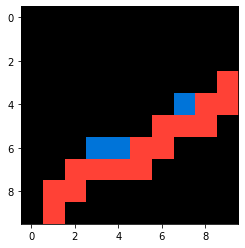

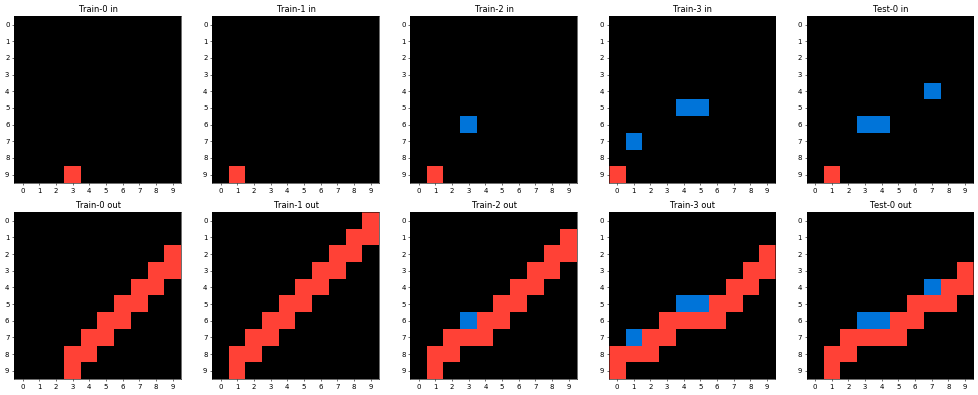

165
229


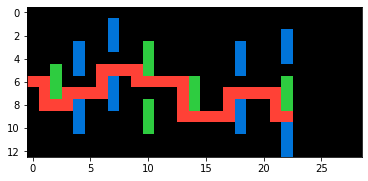

348


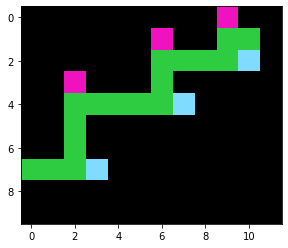

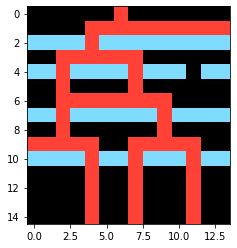

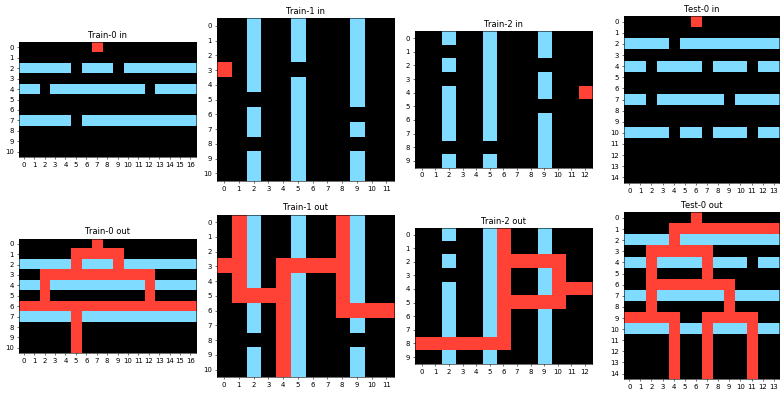

390
2 2


In [22]:
right=0
wrong=0
for i in range(400):
#     print(i)
    task = Evals[i]

    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict_cross_rotate(basic_task)
        

        if a != -1: 
            if task['test'][j]['output'] == a:
                plot_picture(a)
                plot_task(task)
                print(i)
                right+=1
            else:
                print(i)
                plot_picture(a)
                wrong+=1
print(right,wrong)

111


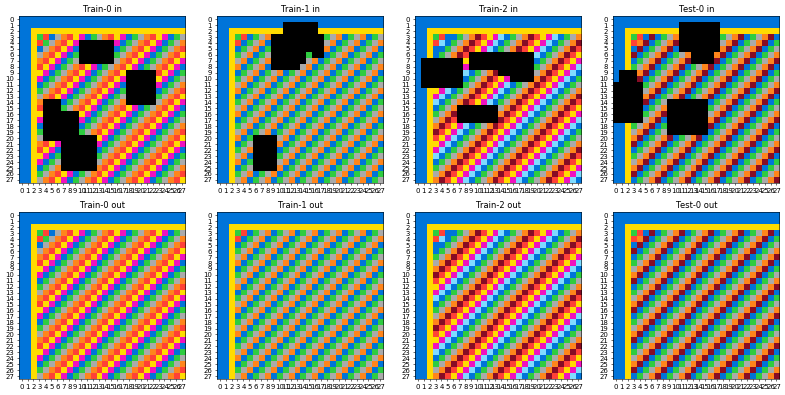

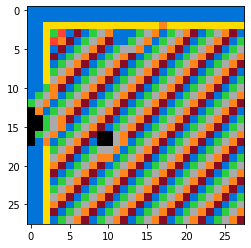

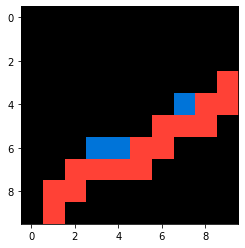

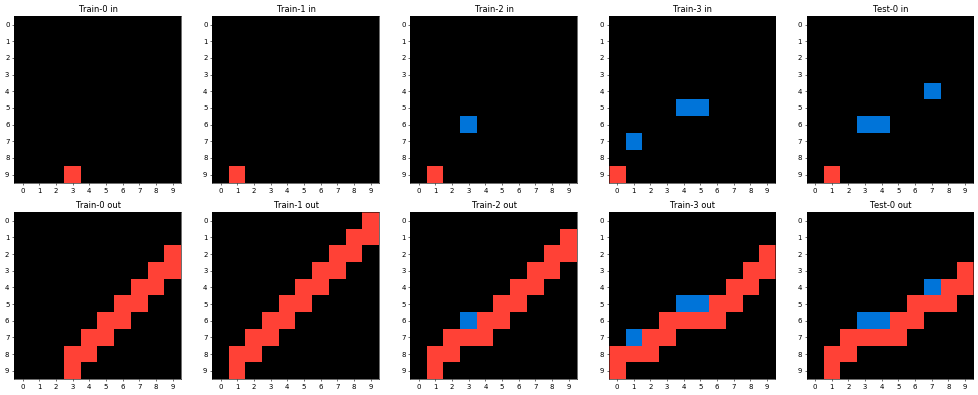

165
173


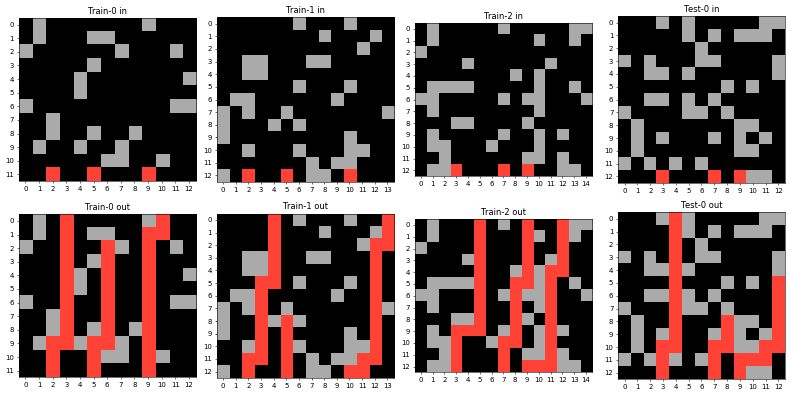

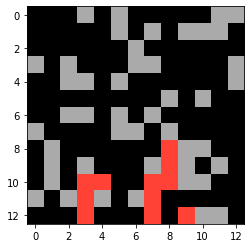

348


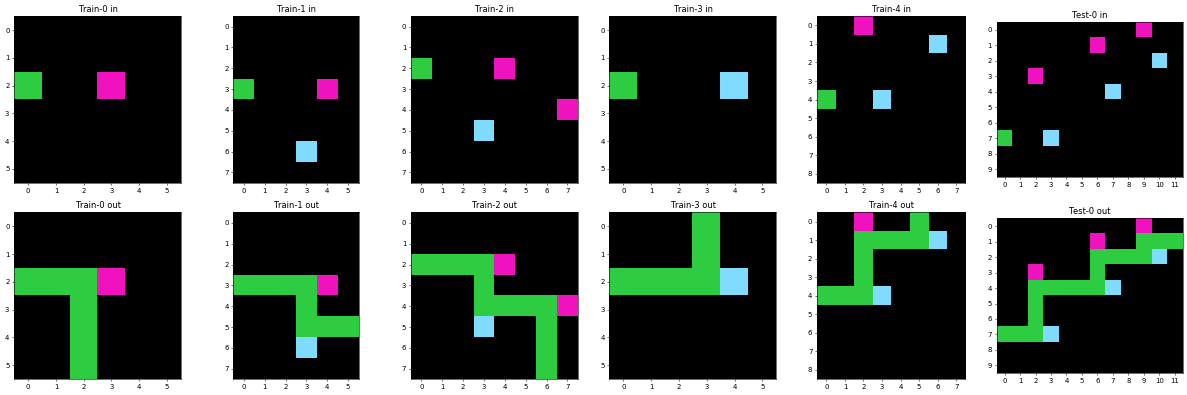

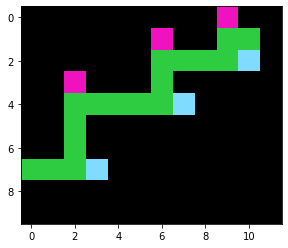

354


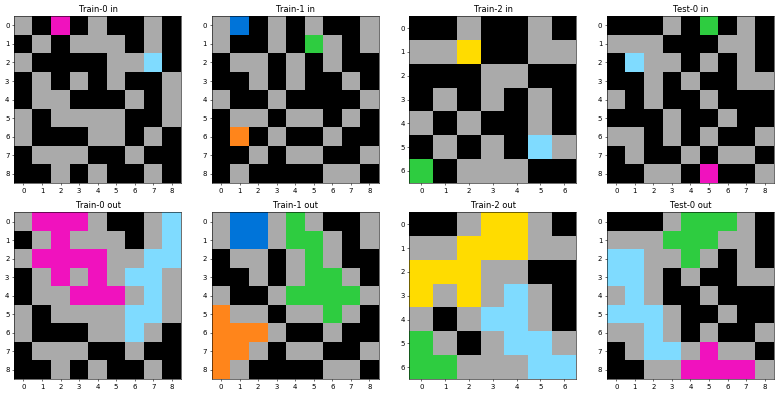

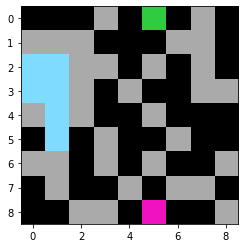

1 4


In [23]:
right=0
wrong=0
for i in range(400):
#     print(i)
    task = Evals[i]

    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict_cross(basic_task)
        

        if a != -1: 
            if task['test'][j]['output'] == a:
                plot_picture(a)
                plot_task(task)
                print(i)
                right+=1
            else:
                print(i)
                plot_task(task)
                plot_picture(a)
                wrong+=1
print(right,wrong)

In [24]:
def findmodemap_cross0(A,B):
    A_array=np.array(A)
    B_pad=np.pad(B,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    m,n=A_pad.shape
    dict1={}
    A1=A_pad.copy()
    A2=A_pad.copy()
    count=0
    for k in range(150):
        
        for i in range(m):
            for j in range(n):
                if A1[i,j]!=-1 and A1[i,j]!=0:
                #if A1[i,j] in color_list:
                    part1=A1[i-1,j]
                    part2=A1[i,j-1]
                    part3=A1[i,j]
                    part4=A1[i,j+1]
                    part5=A1[i+1,j]
                    if (part1,part2,part3,part4,part5) not in dict1:

                        part_b1=B_pad[i-1,j]
                        part_b2=B_pad[i,j-1]
                        part_b3=B_pad[i,j]
                        part_b4=B_pad[i,j+1]
                        part_b5=B_pad[i+1,j]
                        dict1[(part1,part2,part3,part4,part5)]=[part_b1,part_b2,part_b3,part_b4,part_b5]
                        
        
        A1_copy=A1.copy()
        #plot_picture(A2.tolist())
        #A1_copy=A1
        for i in range(m):
            for j in range(n):
                if A1_copy[i,j]!=-1 and A1_copy[i,j]!=0:
                #if A1[i,j] in color_list:
                    part1=A1_copy[i-1,j]
                    part2=A1_copy[i,j-1]
                    part3=A1_copy[i,j]
                    part4=A1_copy[i,j+1]
                    part5=A1_copy[i+1,j]
                
                    if (part1,part2,part3,part4,part5) in dict1:

                        list_from_dict=dict1[(part1,part2,part3,part4,part5)]
                        A2[i-1,j]=list_from_dict[0]
                        A2[i,j-1]=list_from_dict[1]
                        A2[i,j]=list_from_dict[2]
                        A2[i,j+1]=list_from_dict[3]
                        A2[i+1,j]=list_from_dict[4]

        #plot_picture(A2.tolist())                
        if (A2==A1_copy).all():
            count+=1
            
        else:
            count=0
        if count>=3:
            break

        A1=A2
            
            
    return dict1
def usemodedict_cross0(A,dict1):

    A_array=np.array(A)
    A_pad=np.pad(A,((1,1),(1,1)),"constant",constant_values=(-1,-1))
    m,n=A_pad.shape
    A1=A_pad.copy()
    A2=A_pad.copy()
    count=0
    for k in range(200):
        A1_copy=A1.copy()
        for i in range(m):
            for j in range(n):
                if A1[i,j]!=-1 and A1[i,j]!=0:
                #if A1[i,j] in color_list:
                    part1=A1_copy[i-1,j]
                    part2=A1_copy[i,j-1]
                    part3=A1_copy[i,j]
                    part4=A1_copy[i,j+1]
                    part5=A1_copy[i+1,j]
                    if (part1,part2,part3,part4,part5) in dict1:

                        list_from_dict=dict1[(part1,part2,part3,part4,part5)]
                        A2[i-1,j]=list_from_dict[0]
                        A2[i,j-1]=list_from_dict[1]
                        A2[i,j]=list_from_dict[2]
                        A2[i,j+1]=list_from_dict[3]
                        A2[i+1,j]=list_from_dict[4]
                        
        A1=A2
#         plot_picture(A1.tolist())
        if (A2==A1_copy).all():
            count+=1
#             plot_picture(A2.tolist())
        else:
            count=0
        if count>=3:
            break
    return A1[1:-1,1:-1].tolist()


def Solve_mode_dict_cross0(basic_task): 
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    total_dict={}

    for x, y in zip(Input,Output):

        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1
        if findmodemap_cross0(x,y)==-1:
            
            return -1
        else:
            dict1=findmodemap_cross0(x,y)
            
            total_dict={**total_dict,**dict1}
            
    for x, y in zip(Input,Output):
        #plot_picture(usemodedict_cross0(x,total_dict))

        if y!=usemodedict_cross0(x,total_dict):
            return -1
    if usemodedict_cross0(Test_Case,total_dict)==Test_Case:
        return -1
    return usemodedict_cross0(Test_Case,total_dict)

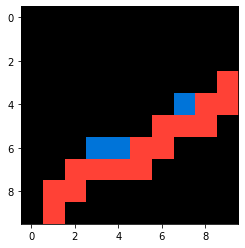

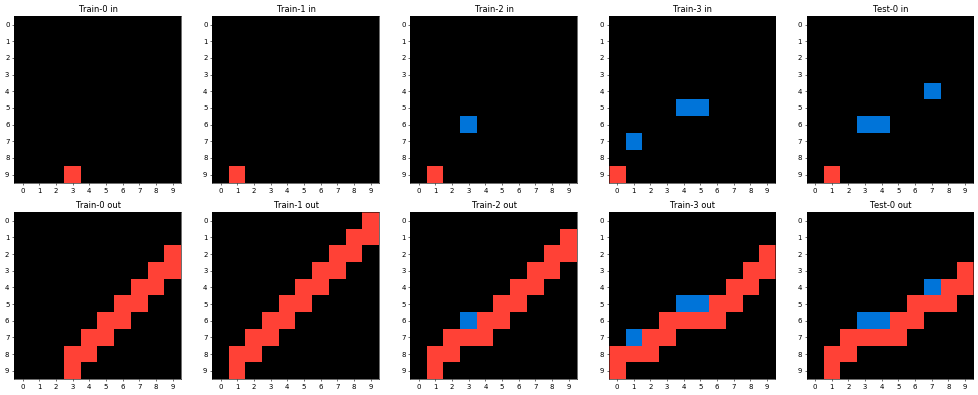

165
1 6


In [25]:
right=0
wrong=0
for i in range(400):
#     print(i)
    task = Evals[i]

    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict_cross0(basic_task)
        

        if a != -1: 
            if task['test'][j]['output'] == a:
                plot_picture(a)
                plot_task(task)
                print(i)
                right+=1
            else:
                #print(i)
                #plot_picture(a)
                wrong+=1
print(right,wrong)